In [128]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [129]:
# Importing our train_set datasets
labels =  ['age', 'workclass', 'fnlwgt', 
           'education', 'educationNo', 
           'marital', 'occupation', 
           'relationship', 'race', 'sex', 
           'gain', 'loss', 
           'hoursPerWeek', 'country', 
           'income']
data_train = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values=["?"], header = None, names = labels)

data_test  = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', na_values=["?"], skiprows = 1, header = None, names = labels)

In [130]:
data_train.head()

,age,workclass,fnlwgt,education,educationNo,marital,occupation,relationship,race,sex,gain,loss,hoursPerWeek,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [131]:
data_test.head()

,age,workclass,fnlwgt,education,educationNo,marital,occupation,relationship,race,sex,gain,loss,hoursPerWeek,country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


DATA ANALYSIS & CLEANING

In [132]:
data_train.replace(' ?', np.nan).dropna().shape  # Our missing rows in train_set

(30162, 15)

In [133]:
data_test.replace(' ?', np.nan).dropna().shape # Our missing rows in test_set

(15060, 15)

In [134]:
train_nomissing_data = data_train.replace('?', np.nan).dropna()
test_nomissing_data  = data_test.replace('?', np.nan).dropna()

In [135]:
#Now let target income thresholds for test_set and check if that will affect train_set features
test_nomissing_data['income'] = test_nomissing_data.income.replace({' <=50K.': ' <=50K', ' >50K.': ' >50K' })

In [136]:
test_nomissing_data.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [137]:
#Let apply Ordinal Encoding to Categoricals instead of One-Hot-Encoding by stacking them vertically
data_mixed = pd.concat([train_nomissing_data, test_nomissing_data], axis = 0)

In [138]:
#Let encode the feature which are not numerical.
for feature in data_mixed.columns:
   if data_mixed[feature].dtype == 'object': #its only applies to columns to with categorical strings
       data_mixed[feature] = pd.Categorical(data_mixed[feature]).codes # Replace strings with an integer

In [139]:
print('workclass =',data_mixed.workclass.unique())
print('education =',data_mixed.education.unique())
print('marital=',data_mixed['marital'].unique())
print('occupation =',data_mixed.occupation.unique())
print('relationship =',data_mixed.relationship.unique())
print('race =',data_mixed.race.unique())
print('sex =',data_mixed.sex.unique())
print('country =',data_mixed['country'].unique())
print('income=',data_mixed.income.unique())

workclass = [7 6 4 1 2 0 5 8 3]
education = [ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]
marital= [4 2 0 3 5 1 6]
occupation = [ 1  4  6 10  8 12  3 14  5  7 13  0 11  2  9]
relationship = [1 0 5 3 4 2]
race = [4 2 1 0 3]
sex = [1 0]
country = [39  5 23 19  0 26 35 33 16  9  2 11 20 30 22 31  4  1 37  7 25 36 14 32
  6  8 10 13  3 24 41 29 28 34 38 12 27 40 17 21 18 15]
income= [0 1]


<AxesSubplot:xlabel='count', ylabel='income'>

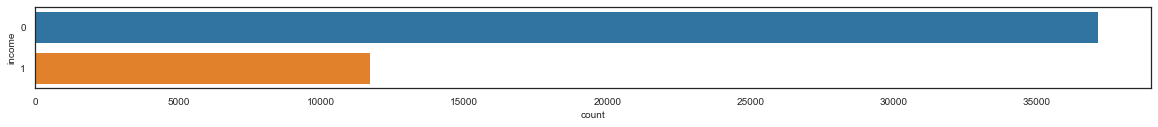

In [140]:
#Visualize income our prediction target.
fig = plt.figure(figsize=(20,1.5))
plt.style.use('seaborn-ticks')
sns.countplot(y="income", data=data_mixed, order=data_mixed['income'].value_counts().index)

The graph shows that income 0 (<=50K) is triple times more than income 1 (>50K). 

<AxesSubplot:xlabel='count', ylabel='marital'>

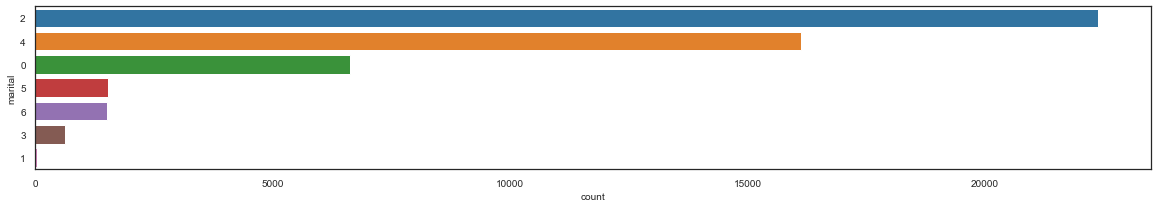

In [142]:
#Visualize marital our prediction target.
fig = plt.figure(figsize=(20, 3))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital", data=data_mixed, order=data_mixed['marital'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='occupation'>

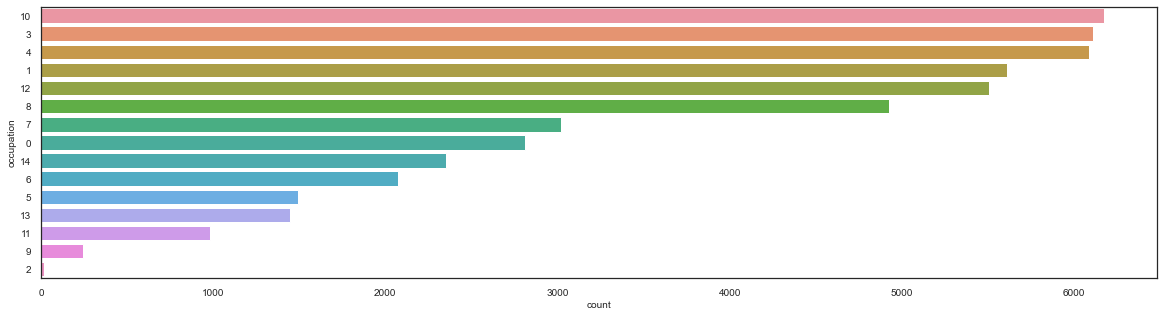

In [145]:
#Visualize Occupation our prediction target.
fig = plt.figure(figsize=(20, 5))
plt.style.use('seaborn-ticks')
sns.countplot(y="occupation", data=data_mixed, order=data_mixed['occupation'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='education'>

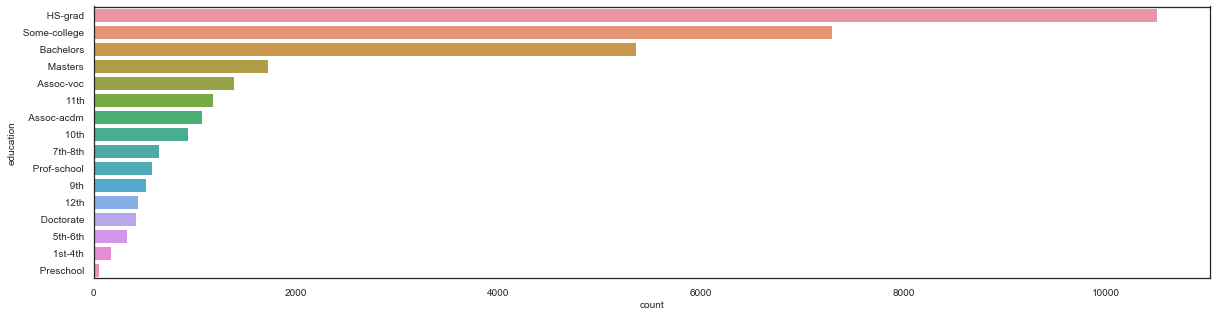

In [149]:
fig = plt.figure(figsize=(20,5))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=data, order=data['education'].value_counts().index)